In [1]:
import pandas as pd
import numpy as np
import os

import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
train_df = pd.read_csv('diabetes.csv')
train_df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [5]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [6]:
train_df.isna().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

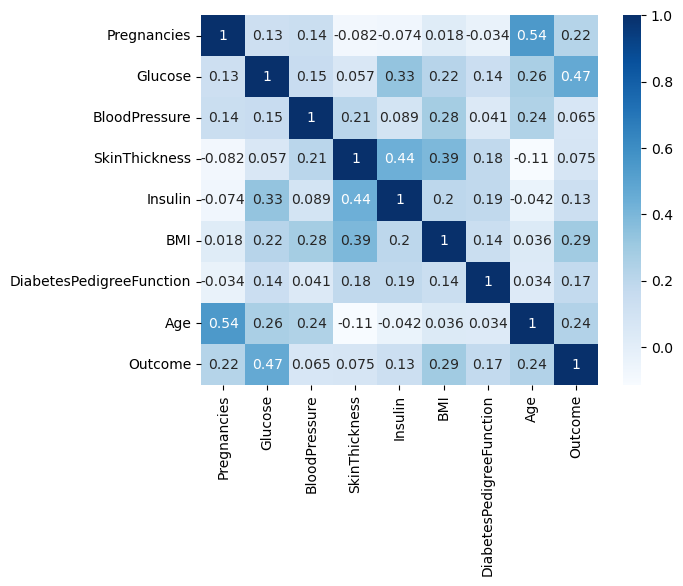

In [7]:
sns.heatmap(train_df.corr(), annot=True, cmap='Blues')
plt.show()

In [8]:
train_df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [9]:
select_cols = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age']

In [11]:
X = train_df[select_cols]
y = train_df['Outcome']

In [17]:
from sklearn.model_selection import train_test_split # training and testing datasset split
from sklearn.preprocessing import StandardScaler #Standardization the data (x-mean)/std.deviation
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score, precision_score, f1_score

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.20, random_state=42)

In [19]:
X_train.shape

(614, 8)

In [20]:
X_test.shape

(154, 8)

In [22]:
tree_mod_1 = DecisionTreeClassifier()
tree_mod_1.fit(X_train, y_train)

DecisionTreeClassifier()

In [23]:
pred_values = tree_mod_1.predict(X_test)
pred_values

array([1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1,
       0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1,
       1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1,
       0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0],
      dtype=int64)

In [24]:
print('Validation accuracy', accuracy_score(y_test, pred_values) * 100)

Validation accuracy 74.02597402597402


In [26]:
from sklearn.metrics import confusion_matrix

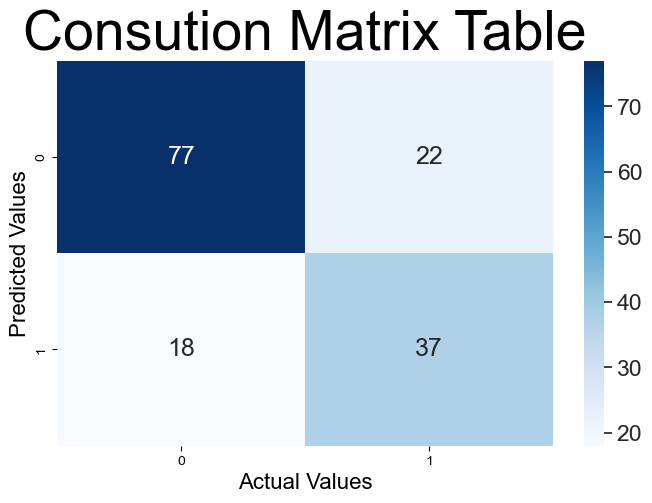

In [27]:
cm = confusion_matrix(y_test, pred_values)
plt.subplots(figsize = (8, 5))
sns.set(font_scale=1.5)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title("Consution Matrix Table", fontsize=40)
plt.xlabel('Actual Values', fontsize=16)
plt.ylabel('Predicted Values', fontsize=16)
plt.show()

In [28]:
y_test.shape

(154,)

In [30]:
1-(40/154)

0.7402597402597403

In [31]:
from sklearn.model_selection import cross_val_score

In [35]:
# Cross validation score
tree_mod_2 = DecisionTreeClassifier()
cv_score = cross_val_score(tree_mod_2, X, y, cv=5, scoring='accuracy')
cv_score

array([0.69480519, 0.69480519, 0.68181818, 0.79084967, 0.74509804])

In [36]:
print('Validation Accuracy', cv_score.mean() * 100)

Validation Accuracy 72.14752567693743


In [37]:
# F1 Score
cv_score = cross_val_score(tree_mod_2, X, y, cv=5, scoring='f1')
cv_score

array([0.53333333, 0.56910569, 0.51428571, 0.67961165, 0.57142857])

In [38]:
cv_score = cross_val_score(tree_mod_2, X, y, cv=5, scoring='recall')
cv_score

array([0.5       , 0.66666667, 0.57407407, 0.66037736, 0.54716981])

In [40]:
# Hyper parameter tuning
from sklearn.model_selection import GridSearchCV

tree_mod_hpt = DecisionTreeClassifier()

hpt_grid = {
    'max_depth': [None, 3, 5, 10, 20],
    'min_samples_split': [2, 5, 10], 
    'min_samples_leaf': [1, 2, 4],
}

grid_search = GridSearchCV(estimator=tree_mod_hpt, param_grid=hpt_grid, cv=5, scoring='accuracy')
grid_search.fit(X,y)

best_params = grid_search.best_params_
print("Best Hyperparameters: ", best_params)

### Get the best mean CV score
best_score = grid_search.best_score_
print("Best score: ", best_score)

Best Hyperparameters:  {'max_depth': 5, 'min_samples_leaf': 1, 'min_samples_split': 5}
Best score:  0.7513878278584161


In [41]:
## Creat a customer model using the best hyperparameters

### Initialize the DT classifier
tree_mod_hpt_best = DecisionTreeClassifier(max_depth=3, min_samples_split=2, min_samples_leaf=1)

tree_mod_hpt_best.fit(X_train, y_train)
pred_values = tree_mod_1.predict(X_test)

print('Validation accuracy', accuracy_score(y_test, pred_values) * 100)

Validation accuracy 74.02597402597402
